# **Course Project Chapter 3 House Prices**
_David da Paz (May 2018)_
___
1. Importing and cleaning the data
     - 1.1 Removing unnecessary data
     - 1.2 Handle missing values
     - 1.3 Removing duplicates
     - 1.4 Find and remove outliers
2. Encoding and feature engineering
     - 2.1 Adding "logSalePrice"
     - 2.2 Adding "total_surface", "age" 
     - 2.3 Variables visualization
     - 2.4 Categorical variables
     - 2.5 Encoding
3. Simple model prediction
     - 3.1 Split the data
     - 3.2 Variables
     - 3.3 Fit
     - 3.4 Predict
     - 3.5 Evaluation
4. Intermediate model prediction
     - 4.1 Correlation matrix and variable selection
     - 4.2 Modelling
     - 4.3 Predict
     - 4.4 Evaluation
     - 4.5 Regularization (Ridge Regression)
     - 4.6 Tuning
5. Complex model prediction
     - 5.1 Data preparation
     - 5.2 Modelling
     - 5.3 Predict 
     - 5.4 Regularization (Ridge Regression)
     - 5.5 Tuning
6. Model evaluation

7. Predictions
     - 7.1 Data import and preparation
     - 7.2 Create dataframe
     - 7.3 Check distribution
     - 7.4 Save data

8. Final notes

# 1. Importing and cleaning the data

## 1.1 Removing unnecessary data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [2]:
data_df.drop(['Order', 'PID'], axis=1, inplace = True)

## 1.2 Handle missing values

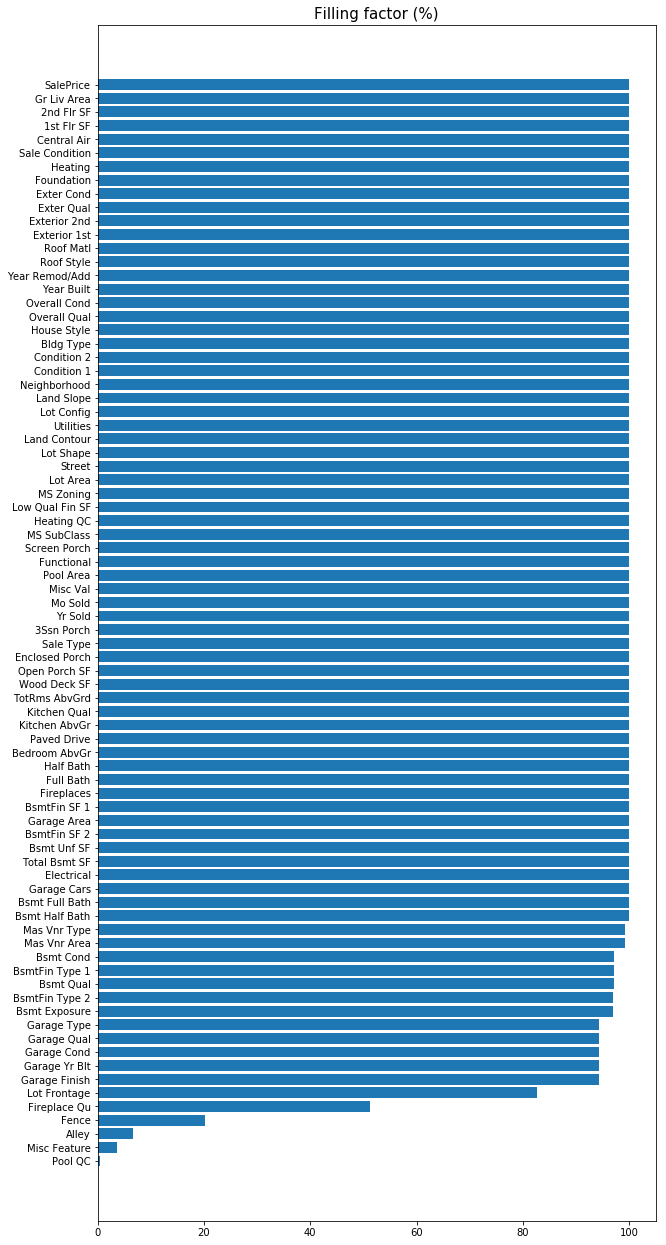

In [3]:
def filling_factor(data_df):
    missing_df = data_df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['filling_factor'] = (data_df.shape[0]-missing_df['missing_count'])/data_df.shape[0]*100
    missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
    return missing_df
#____________________________________
missing_df = filling_factor(data_df)
missing_df[missing_df['filling_factor'] == 0]

col_filling = filling_factor(data_df)

y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
plt.barh(x_axis, y_axis)
plt.show()

In [4]:
data_df['Pool QC'].fillna(value= 'NA', inplace=True)

data_df['Misc Feature'].fillna(value= 'NA', inplace=True)

data_df['Alley'].fillna(value= 'NA', inplace=True)

data_df['Fence'].fillna(value= 'NA', inplace=True)

data_df['Mas Vnr Type'].fillna(value= 'None', inplace=True)

data_df['Mas Vnr Area'].fillna(value= 0, inplace=True)

data_df['Fireplace Qu'].fillna(value= 'NA', inplace=True)

bas_features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for col in bas_features:
    data_df[col].fillna(value= 'NA', inplace=True)

    
bas_features2 = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

for col in bas_features:
    data_df[col].fillna(value= 0, inplace=True)
    
data_df['Lot Frontage'].describe()

data_df['Lot Frontage'].fillna(value = data_df['Lot Frontage'].mean(), inplace = True)

data_df['Garage Type'].fillna(value = 'NA', inplace = True)
data_df['Garage Cond'].fillna(value = 'NA', inplace = True)
data_df['Garage Qual'].fillna(value = 'NA', inplace = True)
data_df['Garage Finish'].fillna(value = 'NA', inplace = True)
data_df['Garage Yr Blt'].fillna(value = 0, inplace = True)
data_df['Garage Cars'].fillna(value = 0, inplace = True)
data_df['Garage Area'].fillna(value = 0, inplace = True)

data_df['Bsmt Full Bath'].fillna(value = 0, inplace = True)
data_df['Bsmt Half Bath'].fillna(value = 0, inplace = True)

data_df['Electrical'].value_counts()

data_df['Electrical'].fillna(value = 'SBrkr', inplace = True)

data_df['Total Bsmt SF'].fillna(value = 0, inplace = True)
data_df['Bsmt Unf SF'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 2'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 1'].fillna(value = 0, inplace = True)



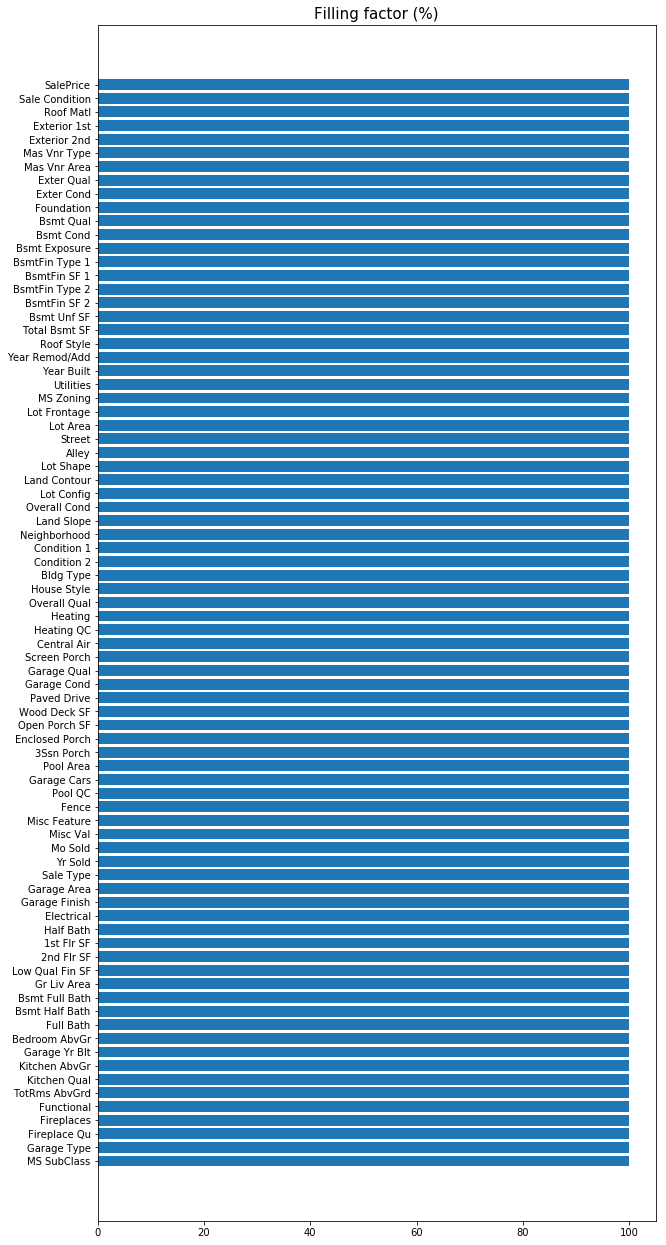

In [5]:
col_filling = filling_factor(data_df)

# plotting the data
y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
#plt.axvline(x=95, linewidth=2, color = 'r')
plt.barh(x_axis, y_axis)
plt.show()

In [6]:
data_df.isnull().sum().sum()

0

## 1.3 Removing duplicates

In [7]:
data_df.loc[data_df.duplicated(),:]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


## 1.4 Find and remove outliers

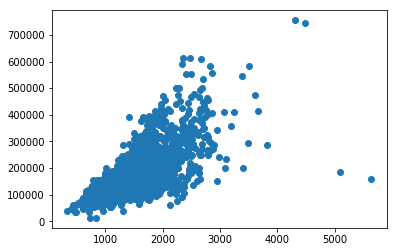

In [8]:
# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['SalePrice'].values)
plt.show()

In [9]:
# We can see 100% outliers in the bottom right corner - I'll delete it
data_df = data_df.drop(data_df[(data_df['Gr Liv Area'] > 4000) & (data_df['SalePrice'] < 300000)].index)

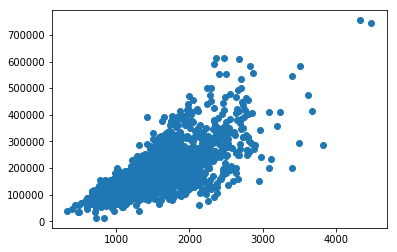

In [10]:
# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['SalePrice'].values)
plt.show()

# 2. Encoding and feature engineering

## 2.1 Adding "logSalePrice"

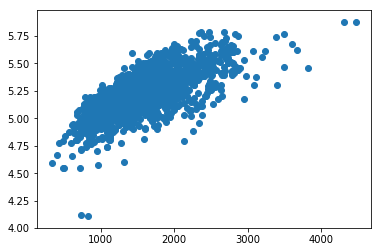

In [11]:
# Add a LogSalePrice variable to the DataFrame
data_df['LogSalePrice'] = np.log10(data_df['SalePrice'])

# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['LogSalePrice'].values)
plt.show()

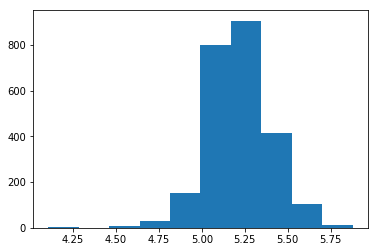

In [12]:
plt.hist(data_df['LogSalePrice'])
plt.show()

## 2.2 Adding "total_surface", "age"

In [13]:
data_df['total_surface'] = data_df['Total Bsmt SF'] + data_df['Gr Liv Area']

In [14]:
data_df['age'] = data_df['Yr Sold'] - data_df['Year Built']

## 2.3 Variables visualization

In [15]:
print('Data from years {} to {}.'.format(data_df['Yr Sold'].min(), data_df['Yr Sold'].max()))

Data from years 2006 to 2010.


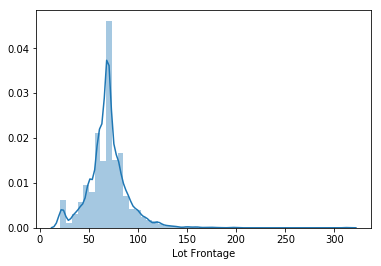

In [16]:
sns.distplot(data_df['Lot Frontage'])

In [17]:
# applying logs Lot Frontage
data_df['Lot Frontage log'] = np.log10(data_df['Lot Frontage'])

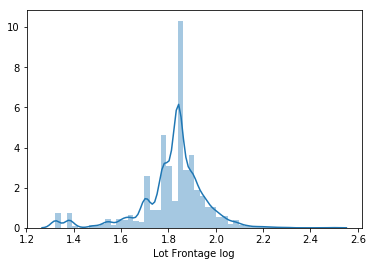

In [18]:
sns.distplot(data_df['Lot Frontage log'])

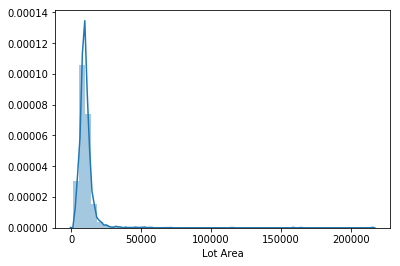

In [19]:
sns.distplot(data_df['Lot Area'])

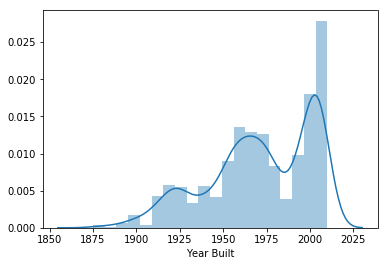

In [20]:
sns.distplot(data_df['Year Built'])

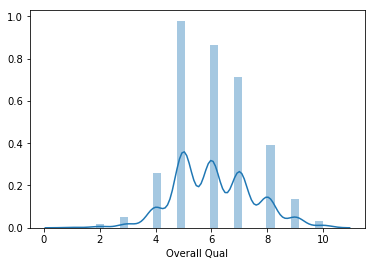

In [21]:
sns.distplot(data_df['Overall Qual'])

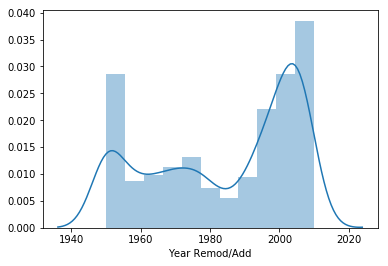

In [22]:
sns.distplot(data_df['Year Remod/Add'])

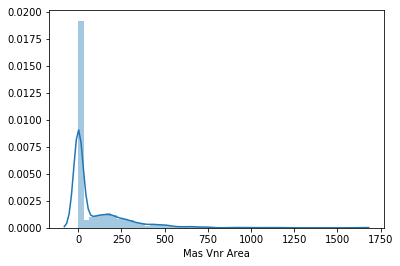

In [23]:
sns.distplot(data_df['Mas Vnr Area'])

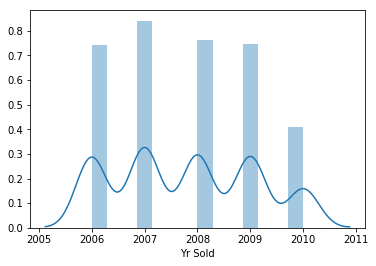

In [24]:
sns.distplot(data_df['Yr Sold'])

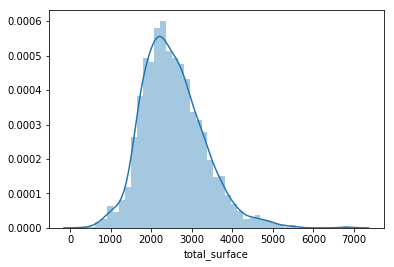

In [25]:
sns.distplot(data_df['total_surface'])

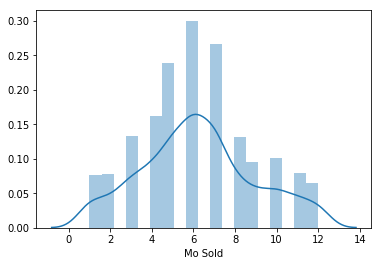

In [26]:
sns.distplot(data_df['Mo Sold'])

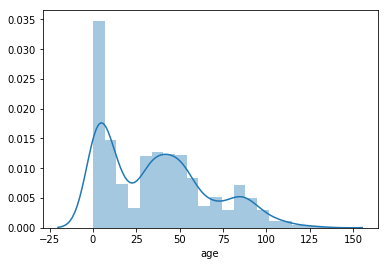

In [27]:
sns.distplot(data_df['age'])

## 2.4 Categorical variables

In [28]:
data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']] = data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']].apply(pd.Categorical)

In [29]:
data_df['Exter Qual'] = pd.Categorical(data_df['Exter Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Exter Cond'] = pd.Categorical(data_df['Exter Cond'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Bsmt Qual'] = pd.Categorical(data_df['Bsmt Qual'], ordered=True, categories=['No basement','Fa','TA','Gd','Ex'])
data_df['Bsmt Cond'] = pd.Categorical(data_df['Bsmt Cond'], ordered=True, categories=['No basement','Po','Fa','TA','Gd'])
data_df['Heating QC'] = pd.Categorical(data_df['Heating QC'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Kitchen Qual'] = pd.Categorical(data_df['Kitchen Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Fireplace Qu'] = pd.Categorical(data_df['Fireplace Qu'], ordered=True, categories=['No fireplace','Po','Fa','TA','Gd','Ex'])
data_df['Garage Qual'] = pd.Categorical(data_df['Garage Qual'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Garage Cond'] = pd.Categorical(data_df['Garage Cond'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Pool QC'] = pd.Categorical(data_df['Pool QC'], ordered=True, categories=['No pool','Fa','Gd','Ex'])

In [30]:
colums_to_encode = ['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Fireplace Qu','Garage Qual',
                                 'Garage Cond','Pool QC']

## 2.5 Encoding

In [31]:
encoded_df = pd.get_dummies(data_df, columns=colums_to_encode)

In [32]:
encoded_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Cond_No garage,Garage Cond_Po,Garage Cond_Fa,Garage Cond_TA,Garage Cond_Gd,Garage Cond_Ex,Pool QC_No pool,Pool QC_Fa,Pool QC_Gd,Pool QC_Ex
0,69.20199,8795,7,5,2000,2000,0.0,300.0,0.0,652.0,...,0,0,0,1,0,0,0,0,0,0
1,75.00000,10170,6,6,1951,1951,522.0,0.0,0.0,216.0,...,0,0,0,1,0,0,0,0,0,0
2,21.00000,2001,4,5,1970,1970,80.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,0,0
3,70.00000,10552,5,5,1959,1959,0.0,1018.0,0.0,380.0,...,0,0,0,1,0,0,0,0,0,0
4,60.00000,10120,7,4,1910,1950,0.0,0.0,0.0,925.0,...,0,0,0,1,0,0,0,0,0,0


# 3. Simple model prediction

## 3.1 Split the data

In [33]:
simple_model_df = encoded_df[['total_surface','Sale Condition_Abnorml','Sale Condition_AdjLand','Sale Condition_Alloca',
                'Sale Condition_Family','Sale Condition_Normal','Sale Condition_Partial','LogSalePrice']]


from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(simple_model_df, train_size=0.5, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (1214, 8)
Test DataFrame: (1214, 8)


## 3.2 Variables

In [34]:
# Create X/y variables
X_tr = train_df.drop('LogSalePrice', axis = 1).values

y_tr_log = train_df['LogSalePrice'].values


X_te = test_df.drop('LogSalePrice', axis = 1).values

y_te_log = test_df['LogSalePrice'].values

In [35]:
from sklearn.linear_model import LinearRegression

# Create a linear regression
lr = LinearRegression()

## 3.3 Fit

In [36]:
# Fit it to train data
lr.fit(X_tr, y_tr_log)

# Print coefficients
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [ 0.00018051 -0.07283537 -0.04068257  0.01880872 -0.06384536  0.03889329
  0.11966129]
Intercept: 4.7270319115861845


## 3.4 Predict

In [37]:
# Compute predictions
y_pred_log = lr.predict(X_te)
y_pred_log.shape

(1214,)

## 3.5 Evaluation

In [38]:
y_pred = 10**y_pred_log
y_te = 10**y_te_log

# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# Mean baseline
mae_baseline = MAE(y_te, np.mean(y_te))

# Linear regression
mae_lr = MAE(y_te, y_pred)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE baseline: 56226.782
MAE linear regression: 28738.204


# 4. Intermediate model prediction

## 4.1 Correlation matrix and variable selection

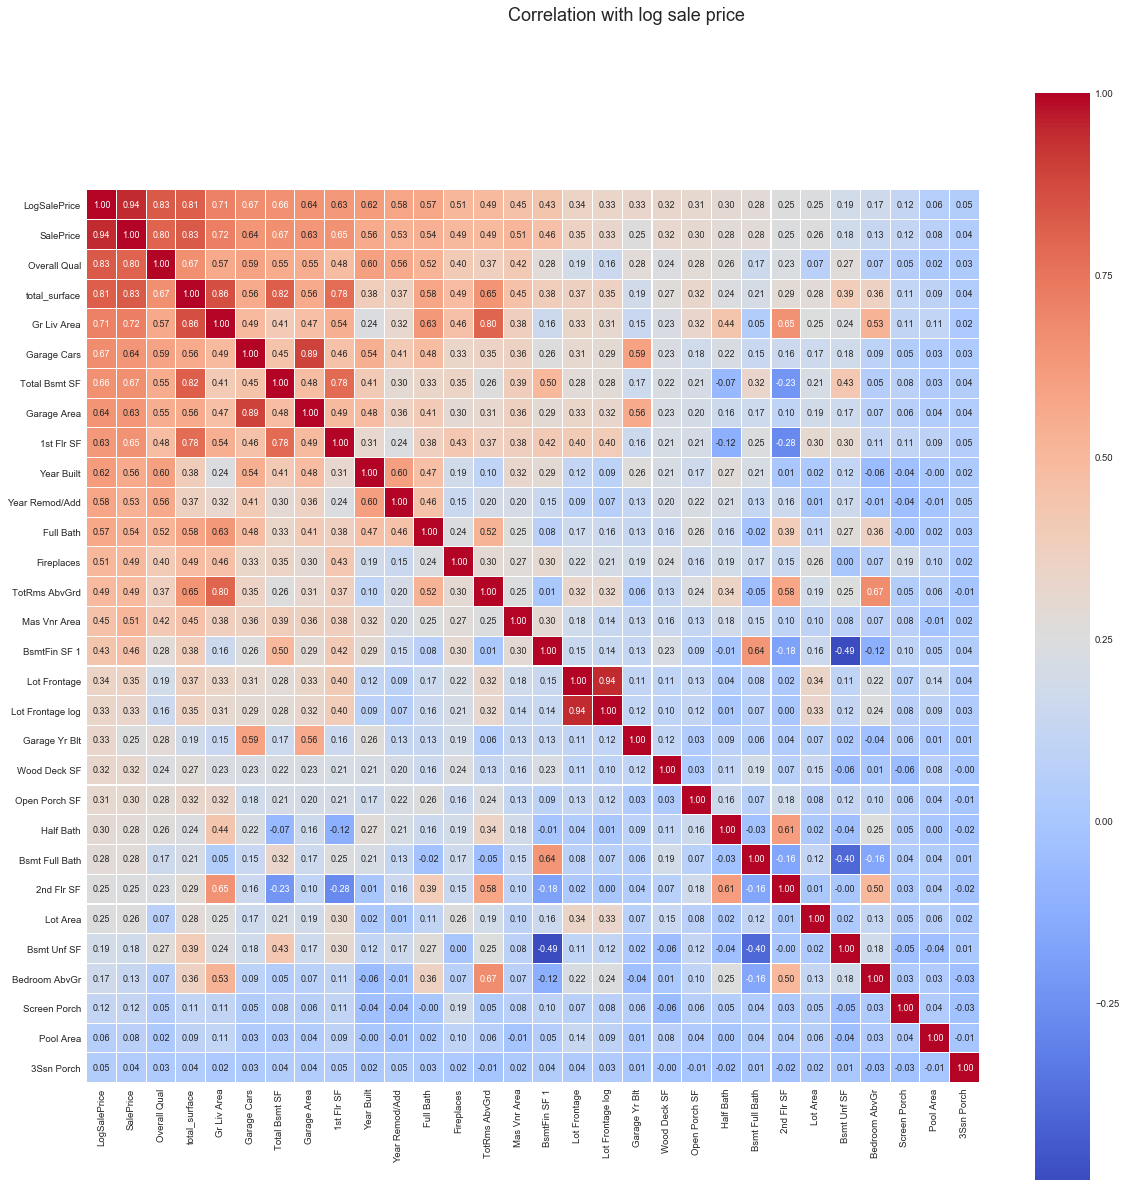

In [39]:
corrmat = data_df.corr()

sns.set(context="paper", font_scale = 1.2)
f, ax = plt.subplots(figsize=(20, 20))
cols = corrmat.nlargest(30, 'LogSalePrice')['LogSalePrice'].index
cm = corrmat.loc[cols, cols] 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation with log sale price", ha='center', fontsize = 18)
plt.show()

In [40]:
intermediate_model_df = encoded_df[['total_surface',
                                    'Sale Condition_Abnorml',
                                    'Sale Condition_AdjLand',
                                    'Sale Condition_Alloca',
                                    'Sale Condition_Family',
                                    'Sale Condition_Normal',
                                    'Sale Condition_Partial',
                                    'LogSalePrice',
                                    'Overall Qual',
                                    'Overall Cond',
                                    'age',
                                    'Garage Cars',
                                    'Garage Area',
                                    'Full Bath',
                                    'Fireplaces',
                                    'Mas Vnr Area',
                                    'TotRms AbvGrd',
                                    'Lot Frontage log',
                                    'Wood Deck SF',
                                    'Open Porch SF',
                                    'Lot Area',
                                    'Pool Area',
                                    'Mo Sold']]

## 4.2 Modelling

In [41]:
# Split into train/test sets
train_df2, test_df2 = train_test_split(intermediate_model_df, train_size=0.5, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df2.shape)
print('Test DataFrame:', test_df2.shape)


# Create X/y variables
X_tr2 = train_df2.drop('LogSalePrice', axis = 1).values

y_tr2_log = train_df2['LogSalePrice'].values


X_te2 = test_df2.drop('LogSalePrice', axis = 1).values

y_te2_log = test_df2['LogSalePrice'].values

Train DataFrame: (1214, 23)
Test DataFrame: (1214, 23)


In [42]:
# Create a linear regression
lr2 = LinearRegression()

In [43]:
# Fit it to train data
lr2.fit(X_tr2, y_tr2_log)

# Print coefficients
print('Coefficients:', lr2.coef_)
print('Intercept:', lr2.intercept_)

Coefficients: [ 9.37662154e-05 -4.40150266e-02  3.20625815e-02  2.73796884e-02
 -5.32787841e-02  9.90041149e-03  2.79511292e-02  3.70671555e-02
  2.41649590e-02 -1.50208375e-03  4.73047945e-03  4.47512721e-05
 -3.02690364e-03  2.40176714e-02  1.44202641e-05  1.53773776e-03
  6.28396951e-02  3.63268698e-05  2.20582244e-05  9.50684377e-07
  5.09029251e-05  5.17826484e-04]
Intercept: 4.487067769082


## 4.3 Predict

In [44]:
# Compute predictions
y_pred2_log = lr2.predict(X_te2)
print(y_pred2_log.shape)

y_pred2 = 10**y_pred2_log
print(y_pred2.shape)

(1214,)
(1214,)


## 4.4 Evaluation

In [45]:
y_te2 = 10**y_te2_log

# Intermetidate Linear regression
mae_lr2 = MAE(y_te2, y_pred2)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))
print('MAE intermediate linear regression: {:.3f}'.format(mae_lr2))

MAE baseline: 56226.782
MAE linear regression: 28738.204
MAE intermediate linear regression: 16251.291


In [46]:
# Check the MAE of train data

y_pred2_log_train = lr2.predict(X_tr2)
print(y_pred2_log_train.shape)

y_pred2_train = 10**y_pred2_log_train
print(y_pred2_train.shape)


y_tr2 = 10**y_tr2_log

# Intermetidate Linear regression train
mae_lr2_train = MAE(y_tr2, y_pred2_train)

print('MAE intermediate linear regression train: {:.3f}'.format(mae_lr2_train))

(1214,)
(1214,)
MAE intermediate linear regression train: 16979.363


## 4.5 Regularization (Ridge Regression)

In [47]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_tr2, y_tr2_log)

# Predict
y_pred2_ridge_log = ridge.predict(X_te2)

#transform it back to USD
y_pred2_ridge = 10**y_pred2_ridge_log

In [48]:
y_pred2_ridge.shape

(1214,)

In [49]:
# Intermediate Linear regression Ridge
mae_ridge = MAE(y_te2, y_pred2_ridge)

print('MAE ridge regression: {:.3f}'.format(mae_ridge))

MAE ridge regression: 16242.962


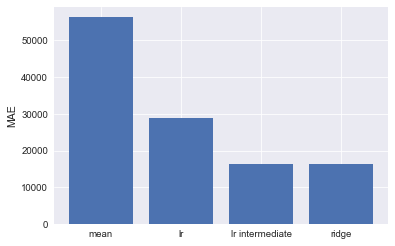

In [50]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_ridge]
titles = ['mean', 'lr','lr intermediate', 'ridge']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()

## 4.6 Tuning

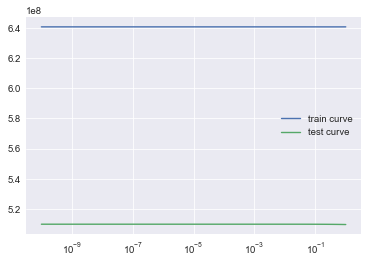

In [51]:
from sklearn.metrics import mean_squared_error as mse


# Define a set of alpha values
alphas = np.logspace(-10, 0, num=100)

# Save train/test scores
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha)
    ridge.fit(X_tr2, y_tr2_log)
    
    # Train score
    y_pred2_ridge_log = ridge.predict(X_tr2)
    y_pred2_ridge = 10**y_pred2_ridge_log
    train_scores.append(mse(y_tr2, y_pred2_ridge))
    
    # Test score
    y_pred2_ridge_log = ridge.predict(X_te2)
    y_pred2_ridge = 10**y_pred2_ridge_log
    test_scores.append(mse(y_te2, y_pred2_ridge))
    
# Plot validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [52]:
# Find best alpha
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

# Print train/test scores
print('Ridge regression 2 - MSE train: {:,.0f} test: {:,.0f}'.format(
    train_scores[idx],
    test_scores[idx]
))

Best alpha 1.0e+00
Ridge regression 2 - MSE train: 640,714,535 test: 509,718,724


In [53]:
# Ridge regression with tuned alpha
ridge2 = Ridge(best_alpha)
ridge2.fit(X_tr2, y_tr2_log)

# Predict
y_pred2_ridge2_log = ridge2.predict(X_te2)

In [54]:
# Intermediate Linear regression Ridge

#transform it back to USD
y_pred2_ridge2 = 10**y_pred2_ridge2_log


mae_ridge2 = MAE(y_te2, y_pred2_ridge2)

print('MAE ridge regression tuned: {:.3f}'.format(mae_ridge2))

MAE ridge regression tuned: 16242.962


# 5. Complex model prediction

## 5.1 Data preparation

In [55]:
# removing repeated columns

encoded_df.drop('SalePrice', axis=1, inplace=True)

In [56]:
# removing repeated columns

encoded_df.drop('Lot Frontage', axis=1, inplace=True)

In [57]:
complex_model_df = encoded_df.copy()

In [58]:
cat_columns = complex_model_df.select_dtypes(['category']).columns
complex_model_df[cat_columns] = complex_model_df[cat_columns].apply(lambda x: x.cat.codes)


In [59]:
# Split into train/test sets
train_df3, test_df3 = train_test_split(complex_model_df, train_size=0.5, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df3.shape)
print('Test DataFrame:', test_df3.shape)


# Create X/y variables
X_tr3 = train_df3.drop('LogSalePrice', axis = 1).values

y_tr3_log = train_df3['LogSalePrice'].values


X_te3 = test_df3.drop('LogSalePrice', axis = 1).values

y_te3_log = test_df3['LogSalePrice'].values

Train DataFrame: (1214, 325)
Test DataFrame: (1214, 325)


## 5.2 Modelling

In [60]:
# Create a linear regression
lr3 = LinearRegression()

In [61]:
# Fit it to train data
lr3.fit(X_tr3, y_tr3_log)

# Print coefficients
print('Coefficients:', lr3.coef_)
print('Intercept:', lr3.intercept_)

Coefficients: [ 8.76014950e-07  2.02727697e-02  1.74125238e-02 -3.44357653e-04
  5.97268624e-05  1.83275475e-05  1.66419790e-05 -1.00471397e-06
 -1.94556246e-05 -3.81835591e-06  8.07392068e-06  4.26052418e-06
  4.91730352e-05  6.15074793e-05  5.96589431e-03  1.07320763e-02
  6.61466908e-03  1.14958018e-02 -3.93146843e-03 -1.49569692e-02
  1.12924983e-02  1.46536247e-03  5.94892228e-03  4.34961246e-05
  5.39436904e-03  4.41399524e-05  9.40427963e-06 -3.96063271e-06
  2.10737476e-05  4.97686057e-05  1.09635806e-04  4.80435527e-05
 -1.92954455e-06  1.57695309e-04 -1.49619101e-03  5.76891248e-05
 -1.15183335e-03  2.94984481e-02  3.38936148e-02  9.31786815e-03
  9.54048532e-02 -5.80344639e-02  3.56100017e-02  1.54207348e-02
  3.12664445e-02  4.28090163e-02 -1.08386239e-02  3.55329208e-02
 -8.78965400e-05 -5.10012612e-03 -1.53851504e-01 -4.79148252e-02
 -3.72936129e-02  1.38655979e-02 -1.89619705e-01 -1.86554439e-02
  6.91620226e-02 -8.88178420e-16  4.40441708e-02  5.41973835e-02
  4.0871571

## 5.3 Predict

In [62]:
# Compute predictions
y_pred3_log = lr3.predict(X_te3)
print(y_pred3_log.shape)

y_pred3 = 10**y_pred3_log
print(y_pred3.shape)

(1214,)
(1214,)


In [63]:
y_te3 = 10**y_te3_log

# Intermetidate Linear regression
mae_lr3 = MAE(y_te3, y_pred3)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))
print('MAE intermediate linear regression: {:.3f}'.format(mae_lr2))
print('MAE complex linear regression: {:.3f}'.format(mae_lr3))

MAE baseline: 56226.782
MAE linear regression: 28738.204
MAE intermediate linear regression: 16251.291
MAE complex linear regression: 13625.232


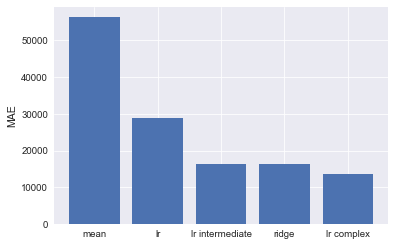

In [64]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_ridge, mae_lr3]
titles = ['mean', 'lr','lr intermediate', 'ridge', 'lr complex']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()

## 5.4 Regularization (Ridge Regression)

In [65]:
# Check the MAE of train data

y_pred3_log_train = lr3.predict(X_tr3)
print(y_pred3_log_train.shape)

y_pred3_train = 10**y_pred3_log_train
print(y_pred3_train.shape)


y_tr3 = 10**y_tr3_log

# complex Linear regression train
mae_lr3_train = MAE(y_tr3, y_pred3_train)

print('MAE complex linear regression train: {:.3f}'.format(mae_lr3_train))

(1214,)
(1214,)
MAE complex linear regression train: 10901.257


In [66]:

# Ridge regression
ridge2 = Ridge()
ridge2.fit(X_tr3, y_tr3_log)

# Predict
y_pred3_ridge_log = ridge2.predict(X_te3)

#transform it back to USD
y_pred3_ridge = 10**y_pred3_ridge_log

In [67]:
y_pred3_ridge.shape

(1214,)

In [68]:
# complex Linear regression Ridge
mae_ridge2 = MAE(y_te3, y_pred3_ridge)

print('MAE ridge regression complex: {:.3f}'.format(mae_ridge2))

MAE ridge regression complex: 13222.455


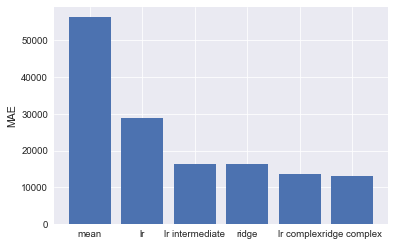

In [69]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_ridge, mae_lr3, mae_ridge2]
titles = ['mean', 'lr','lr intermediate', 'ridge', 'lr complex', 'ridge complex']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()

## 5.5 Tuning

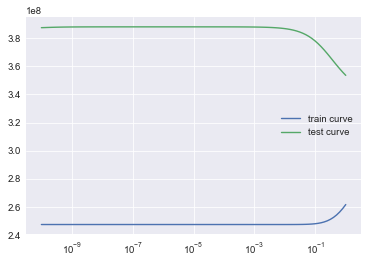

In [70]:
# Define a set of alpha values
alphas = np.logspace(-10, 0, num=100)

# Save train/test scores
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha)
    ridge.fit(X_tr3, y_tr3_log)
    
    # Train score
    y_pred3_ridge_log = ridge.predict(X_tr3)
    y_pred3_ridge = 10**y_pred3_ridge_log
    train_scores.append(mse(y_tr3, y_pred3_ridge))
    
    # Test score
    y_pred3_ridge_log = ridge.predict(X_te3)
    y_pred3_ridge = 10**y_pred3_ridge_log
    test_scores.append(mse(y_te3, y_pred3_ridge))
    
# Plot validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [71]:
# Find best alpha
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

# Print train/test scores
print('Ridge regression 2 - MSE train: {:,.0f} test: {:,.0f}'.format(
    train_scores[idx],
    test_scores[idx]
))

Best alpha 1.0e+00
Ridge regression 2 - MSE train: 261,601,532 test: 353,572,141


In [72]:
# Ridge regression with tuned alpha
ridge2_tuned = Ridge(best_alpha)
ridge2_tuned.fit(X_tr3, y_tr3_log)

# Predict
y_pred2_ridge2_tuned_log = ridge2_tuned.predict(X_te3)

In [73]:
# Complex Linear regression Ridge tuned

#transform it back to USD
y_pred3_ridge3 = 10**y_pred2_ridge2_tuned_log


mae_ridge3 = MAE(y_te3, y_pred3_ridge3)

print('MAE complex ridge regression tuned: {:.3f}'.format(mae_ridge3))

MAE complex ridge regression tuned: 13222.455


# 6. Model evaluation

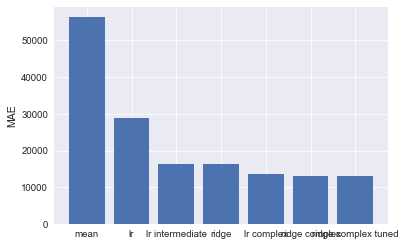

In [74]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_ridge, mae_lr3, mae_ridge2, mae_ridge3]
titles = ['mean', 'lr','lr intermediate', 'ridge', 'lr complex', 'ridge complex', 'ridge complex tuned']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()

# 7. Predictions

## 7.1 Data import and preparation

In [75]:
data_df = pd.read_csv('house-prices-test.csv')

data_df.drop(['Order', 'PID'], axis=1, inplace = True)

data_df['Pool QC'].fillna(value= 'NA', inplace=True)

data_df['Misc Feature'].fillna(value= 'NA', inplace=True)

data_df['Alley'].fillna(value= 'NA', inplace=True)

data_df['Fence'].fillna(value= 'NA', inplace=True)

data_df['Mas Vnr Type'].fillna(value= 'None', inplace=True)

data_df['Mas Vnr Area'].fillna(value= 0, inplace=True)

data_df['Fireplace Qu'].fillna(value= 'NA', inplace=True)

bas_features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for col in bas_features:
    data_df[col].fillna(value= 'NA', inplace=True)

    
bas_features2 = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

for col in bas_features:
    data_df[col].fillna(value= 0, inplace=True)
    
data_df['Lot Frontage'].describe()

data_df['Lot Frontage'].fillna(value = data_df['Lot Frontage'].mean(), inplace = True)

data_df['Garage Type'].fillna(value = 'NA', inplace = True)
data_df['Garage Cond'].fillna(value = 'NA', inplace = True)
data_df['Garage Qual'].fillna(value = 'NA', inplace = True)
data_df['Garage Finish'].fillna(value = 'NA', inplace = True)
data_df['Garage Yr Blt'].fillna(value = 0, inplace = True)
data_df['Garage Cars'].fillna(value = 0, inplace = True)
data_df['Garage Area'].fillna(value = 0, inplace = True)

data_df['Bsmt Full Bath'].fillna(value = 0, inplace = True)
data_df['Bsmt Half Bath'].fillna(value = 0, inplace = True)

data_df['Electrical'].value_counts()

data_df['Electrical'].fillna(value = 'SBrkr', inplace = True)

data_df['Total Bsmt SF'].fillna(value = 0, inplace = True)
data_df['Bsmt Unf SF'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 2'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 1'].fillna(value = 0, inplace = True)


data_df['total_surface'] = data_df['Total Bsmt SF'] + data_df['Gr Liv Area']
data_df['age'] = data_df['Yr Sold'] - data_df['Year Built']
data_df['Lot Frontage log'] = np.log10(data_df['Lot Frontage'])



data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']] = data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']].apply(pd.Categorical)


data_df['Exter Qual'] = pd.Categorical(data_df['Exter Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Exter Cond'] = pd.Categorical(data_df['Exter Cond'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Bsmt Qual'] = pd.Categorical(data_df['Bsmt Qual'], ordered=True, categories=['No basement','Fa','TA','Gd','Ex'])
data_df['Bsmt Cond'] = pd.Categorical(data_df['Bsmt Cond'], ordered=True, categories=['No basement','Po','Fa','TA','Gd'])
data_df['Heating QC'] = pd.Categorical(data_df['Heating QC'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Kitchen Qual'] = pd.Categorical(data_df['Kitchen Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Fireplace Qu'] = pd.Categorical(data_df['Fireplace Qu'], ordered=True, categories=['No fireplace','Po','Fa','TA','Gd','Ex'])
data_df['Garage Qual'] = pd.Categorical(data_df['Garage Qual'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Garage Cond'] = pd.Categorical(data_df['Garage Cond'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Pool QC'] = pd.Categorical(data_df['Pool QC'], ordered=True, categories=['No pool','Fa','Gd','Ex'])

colums_to_encode = ['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Fireplace Qu','Garage Qual',
                                 'Garage Cond','Pool QC']


encoded_df = pd.get_dummies(data_df, columns=colums_to_encode)


## 7.2 Create dataframe

In [76]:
test_df = encoded_df[['total_surface',
                                    'Sale Condition_Abnorml',
                                    'Sale Condition_AdjLand',
                                    'Sale Condition_Alloca',
                                    'Sale Condition_Family',
                                    'Sale Condition_Normal',
                                    'Sale Condition_Partial',
                                    'Overall Qual',
                                    'Overall Cond',
                                    'age',
                                    'Garage Cars',
                                    'Garage Area',
                                    'Full Bath',
                                    'Fireplaces',
                                    'Mas Vnr Area',
                                    'TotRms AbvGrd',
                                    'Lot Frontage log',
                                    'Wood Deck SF',
                                    'Open Porch SF',
                                    'Lot Area',
                                    'Pool Area',
                                    'Mo Sold']]

In [77]:
# Compute predictions
y_predictions = 10**lr2.predict(test_df)

print(y_predictions.shape)


(500,)


In [78]:
import_df = pd.read_csv('house-prices-test.csv')
predictions_df = pd.DataFrame.from_items([('PID', import_df['PID']),('SalePrice', y_predictions)])

## 7.3 Check distribution

In [79]:
# Distribution of the predicted prices
predictions_df.SalePrice.describe()

count    5.000000e+02
mean     1.834563e+05
std      8.753348e+04
min      4.971480e+04
25%      1.280515e+05
50%      1.604207e+05
75%      2.127044e+05
max      1.067683e+06
Name: SalePrice, dtype: float64

## 7.4 Save data

In [80]:
# Save data
predictions_df.to_csv('house-prices-pred.csv', index=False, float_format='%.0f')

## 8 - Final notes

Currently the Ridge regression tuning does not seem to be working properly thus i decided to go ahead and apply the intermediate model despite the overfitting.

Ideally the next steps would be:
1. Tuning parameters in Ridge regressions
2. Write a function to process the data of the test data

Please let me know other issues, improvements you might find.
